In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import pandas_datareader as web
import datetime as dt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import talib
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,balanced_accuracy_score,f1_score,average_precision_score,precision_score,confusion_matrix
from keras.models import Sequential
import time
from keras.layers import Dense
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDRegressor, Lasso, ElasticNet, Perceptron, Ridge
from sklearn import svm
from tensorflow.keras import layers
from sklearn.feature_selection import RFE, SelectFromModel, SelectPercentile, mutual_info_regression, mutual_info_classif, SelectFpr, VarianceThreshold, RFECV
from sklearn.feature_selection import SelectKBest, f_classif, f_regression, chi2
#from yellowbrick.model_selection.importances import FeatureImportances
#from xgboost import XGBRegressor

In [7]:
#Getting Data
start="1-1-1993"
end=dt.datetime.today()

#ticker="^GSPC"
ticker="^BSESN"
#ticker="UBSG.SW"
#ticker="^IXIC"
#ticker="^N225"
#ticker="EZA"

data=web.DataReader(ticker,"yahoo",start,end)
data=data[:]###

#Adding Pct Change/ Mov
data['Pct Change']=data['Close'].pct_change()*100
data['Movement']=None
m=0.2
for i in range(0, len(data['Pct Change'])):
    if data['Pct Change'].iloc[i]<-m:
        data['Movement'].iloc[i]=-1
    elif data['Pct Change'].iloc[i]>m:
        data['Movement'].iloc[i]=1
    else:
        data['Movement'].iloc[i]=0

/Users/advikchaudhary/miniforge3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [8]:
#Feature Engineering

#Basic Features
fdata=pd.DataFrame(index=data.index)
fdata['DReturn']=(data['Close']/data['Open']).apply(np.log)
fdata['Vol']=talib.OBV(data['Close'], data['Volume'])
fdata['High']=data['High'].apply(np.log)
fdata['Pct Change']=data['Pct Change']

period=np.arange(1,31)

#Avg
for i in range(1,200):
    fdata[f'MA {i}']=talib.MA(data['Close'], timeperiod=i, matype=0)    
for i in range(2, len(period)):
    fdata[f'SMA {i}'] = talib.SMA(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'DEMA {i}'] = talib.DEMA(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'TEMA {i}'] = talib.TEMA(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'EMA {i}'] = talib.EMA(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'STDDEV {i}'] = talib.STDDEV(data['Close'], timeperiod=i, nbdev=1)
for i in range(2, len(period)):
    fdata[f'SAREXT {i}'] = talib.SAREXT(data['High'], data['Low'], startvalue=i, offsetonreverse=0, 
                                        accelerationinitlong=0, accelerationlong=0, accelerationmaxlong=0, 
                                        accelerationinitshort=0, accelerationshort=0, accelerationmaxshort=0)
for i in range(2, len(period)):
    fdata[f'WMA {i}'] = talib.WMA(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['Price Volitility']=data['Pct Change'].rolling(i).mean()
    
#Price
fdata['AVGPRICE'] = talib.AVGPRICE(data['Open'],data['High'], data['Low'], data['Close']) 
fdata['MEDPRICE'] = talib.MEDPRICE(data['High'], data['Low'])
fdata['TYPPRICE'] = talib.TYPPRICE(data['High'], data['Low'], data['Close'])  
fdata['WCLPRICE'] = talib.TYPPRICE(data['High'], data['Low'], data['Close'])  

#Moementum
for i in range(2, len(period)):
    fdata[f'ADX {i}'] = talib.ADX(data['High'],data['Low'], data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'ADXR {i}'] = talib.ADXR(data['High'],data['Low'], data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'APO {i}'] = talib.APO(data['Close'], fastperiod=i, slowperiod=i*2, matype=0)
for i in range(2, len(period)):
    fdata[f'AROON D{i}'], fdata[f'AROON U{i}'] = talib.AROON(data['High'],data['Low'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'AROONOSC {i}'] = talib.AROONOSC(data['High'],data['Low'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'BOP {i}'] = talib.BOP(data['Open'], data['High'],data['Low'], data['Close'])
for i in range(2, len(period)):
    fdata[f'CCI {i}'] = talib.CCI(data['High'],data['Low'], data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'CMO {i}'] = talib.CMO(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'DX {i}'] = talib.DX(data['High'],data['Low'], data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'MACD MACD {i}'], fdata[f'MACD SIGNAL{i}'], fdata[f'MACD HIST{i}'] = talib.MACD(data['Close'], fastperiod=i, slowperiod=i*2, signalperiod=i)
for i in range(2, len(period)):
    fdata[f'MACDEXT MACD {i}'], fdata[f'MACDEXT SIGNAL{i}'], fdata[f'MACDEXT HIST{i}'] = talib.MACDEXT(data['Close'], fastperiod=i, fastmatype=0, slowperiod=i*2, 
                                                                                                       slowmatype=0, signalperiod=9, signalmatype=0)
for i in range(2, len(period)):
    fdata[f'MACDFIX MACD {i}'], fdata[f'MACDFIX SIGNAL{i}'], fdata[f'MACDFIX HIST{i}'] = talib.MACDFIX(data['Close'], signalperiod=9)
for i in range(2, len(period)):
    fdata[f'MFI {i}'] = talib.MFI(data['High'],data['Low'], data['Close'], data['Volume'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'MINUS_DI {i}'] = talib.MINUS_DI(data['High'],data['Low'], data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'MINUS_DM {i}'] = talib.MINUS_DM(data['High'],data['Low'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'MOM {i}'] = talib.MOM(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'PLUS_DI {i}'] = talib.PLUS_DI(data['High'],data['Low'], data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'PLUS_DM {i}'] = talib.PLUS_DM(data['High'],data['Low'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'PPO {i}'] = talib.PPO(data['Close'], fastperiod=i, slowperiod=i*2, matype=0)
for i in range(2, len(period)):
    fdata[f'ROC {i}'] = talib.ROC(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'ROCP {i}'] = talib.ROCP(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'ROCR {i}'] = talib.ROCR(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'ROCR100 {i}'] = talib.ROCR100(data['Close'], timeperiod=i)
for i in range(8, len(period), 6):
    fdata[f'RSI {i}'] = talib.RSI(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'STOCH SLOWK {i}'], fdata[f'STOCH SLOWD {i}'] = talib.STOCH(data['High'],data['Low'], data['Close'], 
                                                                       fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
for i in range(2, len(period)):
    fdata[f'STOCHF FASTK {i}'], fdata[f'STOCHF FASTD {i}'] = talib.STOCHF(data['High'],data['Low'], data['Close'], 
                                                                          fastk_period=i, fastd_period=round(i/2), fastd_matype=0)
for i in range(2, len(period)):
    fdata[f'STOCHRSI FASTK {i}'], fdata[f'STOCHRSI FASTD {i}'] = talib.STOCHRSI(data['Close'], timeperiod=i*3, 
                                                                                fastk_period=round(i/2), fastd_period=round(i/3), fastd_matype=0)
for i in range(2, len(period)):
    real = talib.TRIX(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'ULTOSC {i}'] = talib.ULTOSC(data['High'],data['Low'], data['Close'], timeperiod1=i, timeperiod2=i*2, timeperiod3=i*3)
for i in range(2, len(period)):
    fdata[f'WILLR {i}'] = talib.WILLR(data['High'],data['Low'], data['Close'], timeperiod=i)

#Volitility
for i in range(2, len(period)):
    fdata[f'ATR {i}'] = talib.ATR(data['High'],data['Low'], data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'NATR {i}'] = talib.NATR(data['High'],data['Low'], data['Close'], timeperiod=i)  
fdata['TRANGE'] = talib.TRANGE(data['High'],data['Low'], data['Close'])

#Cycle Indicators
fdata['HT_DCPERIOD'] = talib.HT_DCPERIOD(data['Close'])
fdata['HT_DCPHASE'] = talib.HT_DCPHASE(data['Close'])
fdata['HT_TRENDMODE'] = talib.HT_TRENDMODE(data['Close'])

#Statistic Functions
for i in range(2, len(period)):
    fdata[f'BETA {i}'] = talib.BETA(data['High'],data['Low'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'CORREL {i}'] = talib.CORREL(data['High'],data['Low'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'LINEARREG {i}'] = talib.LINEARREG(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'LINEARREG_SLOPE {i}'] = talib.LINEARREG_SLOPE(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'STDDEV {i}'] = talib.STDDEV(data['Close'], timeperiod=i, nbdev=1)
for i in range(2, len(period)):
    fdata[f'TSF {i}'] = talib.TSF(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'VAR {i}'] = talib.VAR(data['Close'], timeperiod=i, nbdev=1)

#Volume Indicator Functions
for i in range(2, len(period)):
    fdata[f'ADOSC {i}'] = talib.ADOSC(data['High'], data['Low'], data['Close'], data['Volume'], fastperiod=i, slowperiod=i*2)
fdata['AD']=talib.AD(data['High'], data['Low'], data['Close'], data['Volume'])
fdata['OBV']=talib.OBV(data['Close'], data['Volume'])

len(fdata.columns)

/var/folders/rf/gmx6s6x51w3f6fwrwhjcrzjm0000gn/T/ipykernel_68965/1742581705.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  fdata[f'MA {i}']=talib.MA(data['Close'], timeperiod=i, matype=0)
/var/folders/rf/gmx6s6x51w3f6fwrwhjcrzjm0000gn/T/ipykernel_68965/1742581705.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  fdata[f'SMA {i}'] = talib.SMA(data['Close'], timeperiod=i)
/var/folders/rf/gmx6s6x51w3f6fwrwhjcrzjm0000gn/T/ipykernel_68965/1742581705.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

1730

In [9]:
#Last nan
lnan=0
for col in range(len(fdata.columns)):
    if fdata.reset_index(drop=True).iloc[:,col].first_valid_index()>lnan:
        lnan=fdata.iloc[:,col].reset_index(drop=True).first_valid_index()

In [11]:
target='Close'

In [38]:
#Feature Selection with scikit regr SPY
selector = SelectKBest(f_classif, k=5)
sf = selector.fit_transform(fdata[lnan:][:-1], data[lnan:][target].shift(-1).dropna())
fnum = selector.get_support(indices=True)

/Users/advikchaudhary/miniforge3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 343  344  345  346  347  348  349  350  351  352  353  354  355  356
  357  358  359  360  361  362  363  364  365  366  367  368  369  370
 1360 1361] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/advikchaudhary/miniforge3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [12]:
#Feature Selection with scikit regr SPY
selector = SelectKBest(f_regression, k=5)
sf = selector.fit_transform(fdata[lnan:][:-1], data[lnan:][target].shift(-1).dropna())
fnum = selector.get_support(indices=True)

/Users/advikchaudhary/miniforge3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/Users/advikchaudhary/miniforge3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/Users/advikchaudhary/miniforge3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


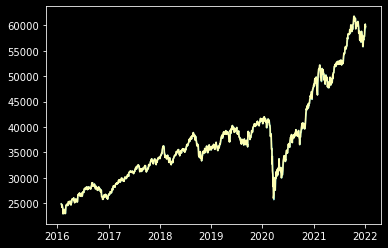

0.5277207392197125

In [16]:
#Data Splitting
#X=fdata[f][lnan:]
#X=fdata[mf][lnan:]
#X=fdata[lnan:]
#X=fdata[['ROC-2','ROC-3','ROCR-2','ROCR-3','ROCP-2','ROCP-3','MOM-2', 'ROCR100-2']]#.dropna()
X=fdata[lnan:].iloc[:, fnum[:]].astype('int')
#X=fdata[lnan:][['MOM 10', 'MACD HIST4', 'CORREL 3', 'PPO 6', 'MACDEXT HIST5','MACD HIST6', 'MOM 17', 'MOM 13', 'MACDEXT HIST6', 'MACDEXT HIST4']]


tmrw=X[-1:]
X=X[:-1]

y=data[target][lnan:].shift(-1).dropna().astype('int')

splitp=int(len(X)*0.75)

X_train= X[:splitp]
X_test = X[splitp:]
y_train= y[:splitp]
y_test= y[splitp:]

#y_train=y_train.astype('int')
#y_test=y_test.astype('int')
X_test.columns


model=LinearRegression()#svm.SVC()
model.fit(X_train, y_train)
pred=model.predict(X_test)
tpred=model.predict(tmrw)
pred=pd.DataFrame(data=pred, index=X_test.index, columns=["Prediction"])
tpred=pd.DataFrame(data=tpred, index=tmrw.index)
plt.plot(pred)
plt.plot(y_test)
plt.plot(tpred)
plt.show()

accuracy_score([1 if i > 0 else 0 for i in pred.pct_change(1)['Prediction']*100], [1 if i > 0 else 0 for i in y_test.pct_change(1)*100])
#accuracy_score(y_test, pred['Prediction'])

In [17]:
y_test, X_test

(Date
 2016-01-29    24824
 2016-02-01    24539
 2016-02-02    24223
 2016-02-03    24338
 2016-02-04    24616
               ...  
 2021-12-31    59183
 2022-01-03    59855
 2022-01-04    60223
 2022-01-05    59601
 2022-01-06    59744
 Name: Close, Length: 1461, dtype: int64,
              MA 1  DEMA 2  TEMA 2  TEMA 3  LINEARREG 2
 Date                                                  
 2016-01-29  24870   24830   24854   24829        24870
 2016-02-01  24824   24846   24839   24857        24824
 2016-02-02  24539   24584   24552   24596        24539
 2016-02-03  24223   24254   24222   24252        24223
 2016-02-04  24338   24306   24317   24286        24338
 ...           ...     ...     ...     ...          ...
 2021-12-31  58253   58211   58232   58205        58253
 2022-01-03  59183   59100   59162   59092        59183
 2022-01-04  59855   59833   59869   59851        59855
 2022-01-05  60223   60251   60244   60284        60223
 2022-01-06  59601   59733   59643   59771       

In [28]:
model=svm.SVC()#RandomForestClassifier()#
model.fit(X_train, y_train)
pred=model.predict(X_test)
tpred=model.predict(tmrw)
pred=pd.DataFrame(data=pred, index=X_test.index, columns=["Prediction"])
tpred=pd.DataFrame(data=tpred, index=tmrw.index)

NameError: name 'X_train' is not defined

In [44]:
accuracy_score(y_test, pred['Prediction'])

0.42052194543297744

In [12]:
#Feature Selection with scikit models
st = time.time()
model = SelectFromModel(estimator=LogisticRegression(), max_features=5).fit(fdata[lnan:][:-1], data[lnan:][target].shift(-1).dropna())
fnum=model.get_support(indices=True)
print("Time Taken: ",time.time()-st)

ValueError: 'max_features' should be 0 and 1 features.Got 5 instead.

In [13]:
fsel=[f_classif,mutual_info_classif,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier]
m=3-1
max=60
fscore=pd.DataFrame(index=np.arange(len(fsel)))
fscore['Feature S']=None
fscore['No. Features']=None
fscore['Model']=None
fscore['Deviation']=None
fscore['Error MAE']=None
fscore['Error R2']=None
fscore['Accuracy']=None


In [29]:
 for featurenum in range(len(fsel)):
    print(f"---FEATURE S: {fsel[featurenum].__name__}---")
    #Feature Selection with scikit regr SPY
    
    k=5
    
    #if fsel[featurenum].__name__=='Lasso' or fsel[featurenum].__name__=='LogisticRegression' or fsel[featurenum].__name__=='LinearRegression':
    if fsel[featurenum]in fsel[m:]:
        model = SelectFromModel(estimator=fsel[featurenum](), max_features=k).fit(fdata[lnan:][:-1], data[lnan:][target].shift(-1).dropna().astype('int'))
        fnum=model.get_support(indices=True)
        
    else:
        selector = SelectKBest(fsel[featurenum], k)
        sf = selector.fit_transform(fdata[lnan:][:-1], data[lnan:][target].shift(-1).dropna().astype('int'))
        fnum = selector.get_support(indices=True) 
    
    
    #Data Splitting
    #X=fdata[f][lnan:]
    #X=fdata[mf][lnan:]
    #X=fdata[lnan:]
    #X=fdata[['ROC-2','ROC-3','ROCR-2','ROCR-3','ROCP-2','ROCP-3','MOM-2', 'ROCR100-2']]#.dropna()
    X=fdata[lnan:].iloc[:, fnum[:]].astype('int')
    #X=fdata[lnan:][['MOM 10', 'MACD HIST4', 'CORREL 3', 'PPO 6', 'MACDEXT HIST5','MACD HIST6', 'MOM 17', 'MOM 13', 'MACDEXT HIST6', 'MACDEXT HIST4']]


    tmrw=X[-1:]
    X=X[:-1]

    y=data[target][lnan:].shift(-1).dropna().astype('int')

    splitp=int(len(X)*0.75)

    X_train= X[:splitp]
    X_test = X[splitp:]
    y_train= y[:splitp]
    y_test= y[splitp:]

    #y_train=y_train.astype('int')
    #y_test=y_test.astype('int')
    X_test.columns
    
    
    model=svm.SVC()
    model.fit(X_train, y_train)
    pred=model.predict(X_test)
    tpred=model.predict(tmrw)
    pred=pd.DataFrame(data=pred, index=X_test.index, columns=["Prediction"])
    tpred=pd.DataFrame(data=tpred, index=tmrw.index)
    plt.show()
    
    accs = {}
    for i in np.arange(0,(len(y_test))-10,10):
        score=accuracy_score(y_test[i:i+10].astype('int'), pred['Prediction'][i:i+10].astype('int'))
        accs.update({f"{i}-{i+10}":score})
        
    fscore['Model'].iloc[featurenum]=model
    fscore['No. Features'].iloc[featurenum]=k
    fscore['Feature S'].iloc[featurenum]=fsel[featurenum].__name__
    fscore['Deviation'].iloc[featurenum]=np.std(list(accs.values()))
    fscore['Accuracy'].iloc[featurenum]=accuracy_score(y_test, pred['Prediction'])

---FEATURE S: f_classif---


TypeError: slice indices must be integers or None or have an __index__ method

In [75]:
fscore.to_csv(f"FC-{ticker}-{target}.csv", index=False)